In [1]:
import os
import numpy as np
import cv2
from  matplotlib import pyplot as plt

In [2]:
def readfile(path, label):
    image_dir = sorted(os.listdir (path)) # 列出所有的檔名
    x = np.zeros((len(image_dir), 128, 128 , 3), dtype =np.uint8)
    y = np.zeros((len(image_dir)),dtype =np.uint8)
    for i, file in enumerate(image_dir):
        img = cv2.imread(os.path.join(path, file))
        x[i,:,:] = cv2.resize(img,(128,128)) # 轉成128*128
        if label:
            y[i] = int(file.split("_")[0])
    if label:
        return x, y
    else:
        return x

In [3]:
train_x, train_y = readfile("./training/", 1)
val_x, val_y = readfile("./validation/", 1)
test_x = readfile("./testing/", 0)

In [4]:

x_img_train_normalize = train_x.astype ('float32') / 255.0
x_img_val_normalize = val_x.astype ('float32') / 255.0
x_img_test_normalize = test_x.astype ('float32') / 255.0
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(train_y)
y_label_val_OneHot = np_utils.to_categorical(val_y)

Using TensorFlow backend.


In [5]:
print(x_img_train_normalize.shape)
print(y_label_train_OneHot.shape)

(6600, 128, 128, 3)
(6600, 11)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),
                            input_shape=(128,128,3),
                            activation = 'relu',
                            padding='same'))
model.add(Dropout(rate=0.5))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(rate=0.5))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5)) 

model.add(Dense(11,activation='softmax'))


print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)            

In [7]:
model.compile(loss="categorical_crossentropy",
    optimizer="adam", metrics=['accuracy'])

                 
train_histoty=model.fit(x_img_train_normalize, y_label_train_OneHot, 
                validation_data=(x_img_val_normalize, y_label_val_OneHot),
                epochs=50, batch_size=128, verbose=1)


Train on 6600 samples, validate on 2200 samples
Epoch 1/20
6600/6600 [==============================] - 15s 2ms/step - loss: 7.0921 - accuracy: 0.1630 - val_loss: 2.2223 - val_accuracy: 0.2909
Epoch 2/20
6600/6600 [==============================] - 13s 2ms/step - loss: 2.0046 - accuracy: 0.3015 - val_loss: 2.1162 - val_accuracy: 0.2918
Epoch 3/20
6600/6600 [==============================] - 13s 2ms/step - loss: 1.8867 - accuracy: 0.3485 - val_loss: 2.0355 - val_accuracy: 0.3132
Epoch 4/20
6600/6600 [==============================] - 13s 2ms/step - loss: 1.7644 - accuracy: 0.3915 - val_loss: 1.9601 - val_accuracy: 0.3591
Epoch 5/20
6600/6600 [==============================] - 13s 2ms/step - loss: 1.6630 - accuracy: 0.4279 - val_loss: 1.9427 - val_accuracy: 0.3677
Epoch 6/20
6600/6600 [==============================] - 13s 2ms/step - loss: 1.5522 - accuracy: 0.4688 - val_loss: 1.9100 - val_accuracy: 0.3773
Epoch 7/20
6600/6600 [==============================] - 13s 2ms/step - loss: 1.406

In [8]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_histoty.history[train_acc])
    plt.plot(train_histoty.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

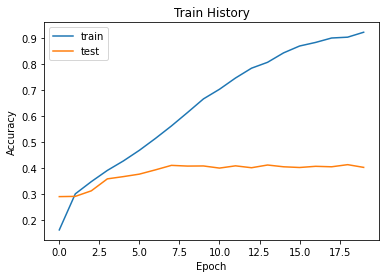

In [9]:
show_train_history('accuracy','val_accuracy')

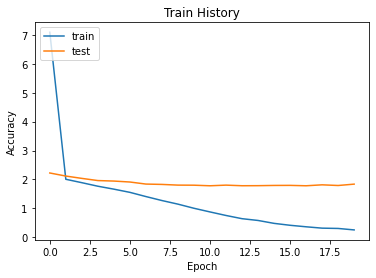

In [10]:
show_train_history('loss','val_loss')

In [11]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_val_OneHot, verbose=0)
scores[1]

0.09272727370262146

In [12]:
prediction=model.predict_classes(x_img_val_normalize)

In [13]:
prediction[:10]

array([ 0,  0,  9,  0,  0,  3,  0, 10, 10, 10], dtype=int64)

In [35]:
label_dict={"Back ribs": 0, "Bibimbap" : 1,
"Cheesecake": 2, "Chicken wings": 3, "Sandwich": 4, "Cup cake": 5, "Donuts": 6,
"Dumplings": 7, "Edamame": 8, "Fried rice": 9, "Hamburger": 10}